In [74]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [75]:
#import the dataset
dataset = pd.read_csv("Dataset/covid19_Confirmed_dataset.csv")
dataset.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [76]:
dataset.shape

(266, 104)

In [77]:
#delete the useless columns
df = dataset.drop(["Lat","Long"], axis= 1, inplace = True) 

In [78]:
dataset.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [79]:
#Aggeregate the rows by the country
corona_dataset_aggregated = dataset.groupby("Country/Region").sum()

In [80]:
corona_dataset_aggregated.head()

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [81]:
corona_dataset_aggregated.shape

(187, 101)

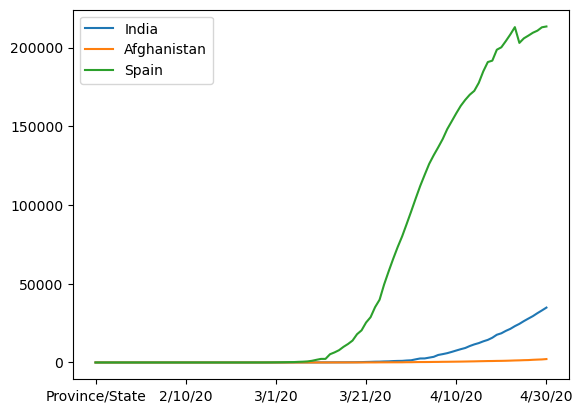

In [82]:
#visualise data related to a country
corona_dataset_aggregated.loc["India"].plot()
corona_dataset_aggregated.loc["Afghanistan"].plot()
corona_dataset_aggregated.loc["Spain"].plot()
plt.legend()

In [1]:
#calculate a good measure
corona_dataset_aggregated.loc["Spain"][:3].plot()

NameError: name 'corona_dataset_aggregated' is not defined

<Axes: >

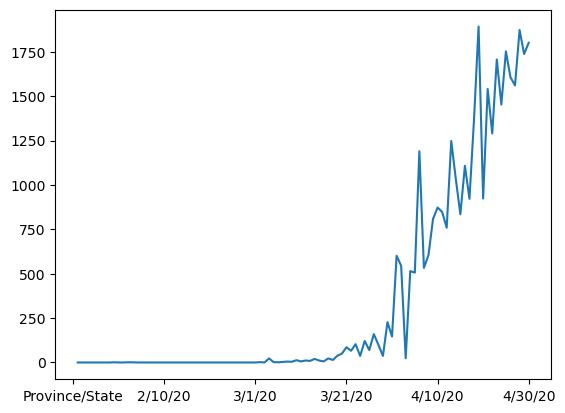

In [84]:
#calculate the first derivative of the curve
corona_dataset_aggregated.loc["India"].diff().plot()

In [85]:
#maximum infection rate
corona_dataset_aggregated.loc["India"].diff().max()

1893

In [86]:
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []

for c in countries:
    # Convert the column to numeric before using diff()
    corona_dataset_aggregated.loc[c] = pd.to_numeric(corona_dataset_aggregated.loc[c], errors='coerce')
    max_infection_rates.append(corona_dataset_aggregated.loc[c].diff().max())

corona_dataset_aggregated["Max_infection_rates"] = max_infection_rates

In [87]:
corona_dataset_aggregated

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Max_infection_rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,474,480,484,342,342,342,343,344,344,66
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,4
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,6,6,5


In [88]:
#create new dataframe
corona_data = pd.DataFrame(corona_dataset_aggregated["Max_infection_rates"])

In [89]:
corona_data

,Max_infection_rates
Country/Region,
Afghanistan,232
Albania,34
Algeria,199
Andorra,43
Angola,5
...,...
West Bank and Gaza,66
Western Sahara,4
Yemen,5


In [90]:
#importing the dataset 2
happiness_report = pd.read_csv("Dataset\worldwide_happiness_report.csv")

In [91]:
happiness_report

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [92]:
#drop the useless columns
useless_cols = ["Overall rank", "Score","Generosity", "Perceptions of corruption"]

In [93]:
happiness_report.drop(useless_cols, axis=1, inplace = True)

In [94]:
happiness_report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [95]:
happiness_report.set_index("Country or region", inplace= True)
happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [96]:
corona_data.shape

(187, 1)

In [97]:
happiness_report.shape

(156, 4)

In [98]:
data = corona_data.join(happiness_report, how = "inner")
data

,Max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232,0.350,0.517,0.361,0.000
Albania,34,0.947,0.848,0.874,0.383
Algeria,199,1.002,1.160,0.785,0.086
Argentina,291,1.092,1.432,0.881,0.471
Armenia,134,0.850,1.055,0.815,0.283
...,...,...,...,...,...
Venezuela,29,0.960,1.427,0.805,0.154
Vietnam,19,0.741,1.346,0.851,0.543
Yemen,5,0.287,1.163,0.463,0.143
Zambia,9,0.578,1.058,0.426,0.431


In [99]:
data.corr()

,Max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Max_infection_rates,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


In [100]:
data

,Max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232,0.350,0.517,0.361,0.000
Albania,34,0.947,0.848,0.874,0.383
Algeria,199,1.002,1.160,0.785,0.086
Argentina,291,1.092,1.432,0.881,0.471
Armenia,134,0.850,1.055,0.815,0.283
...,...,...,...,...,...
Venezuela,29,0.960,1.427,0.805,0.154
Vietnam,19,0.741,1.346,0.851,0.543
Yemen,5,0.287,1.163,0.463,0.143
Zambia,9,0.578,1.058,0.426,0.431


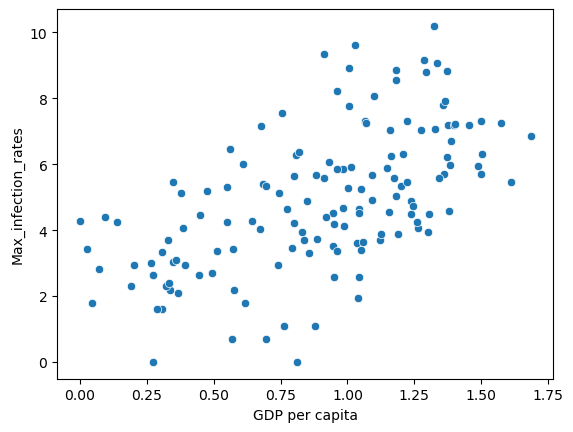

In [103]:
import numpy as np

# Assuming data is your DataFrame
x = data["GDP per capita"]
y = data["Max_infection_rates"]

# Applying log transformation
log_y = np.log(y)

# Using scatterplot with log-transformed data
sns.scatterplot(x=x, y=log_y)
plt.show()


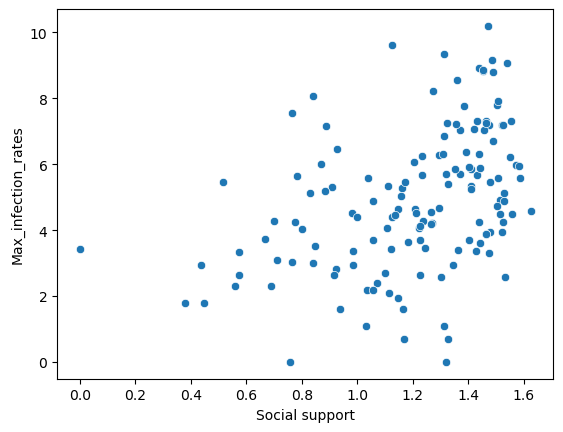

In [104]:
import numpy as np

# Assuming data is your DataFrame
x = data["Social support"]
y = data["Max_infection_rates"]

# Applying log transformation
log_y = np.log(y)

# Using scatterplot with log-transformed data
sns.scatterplot(x=x, y=log_y)
plt.show()


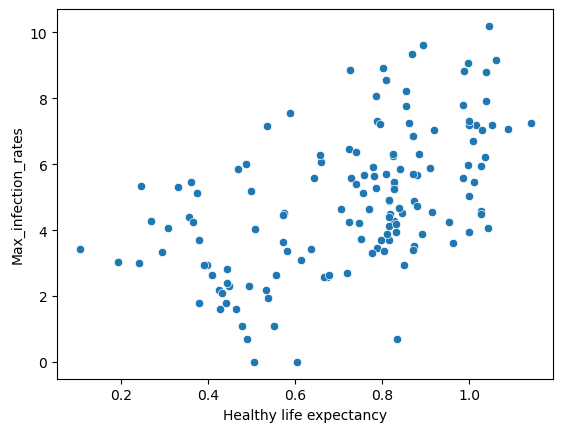

In [105]:
import numpy as np

# Assuming data is your DataFrame
x = data["Healthy life expectancy"]
y = data["Max_infection_rates"]

# Applying log transformation
log_y = np.log(y)

# Using scatterplot with log-transformed data
sns.scatterplot(x=x, y=log_y)
plt.show()
